In [1]:
import pandas as pd
import numpy as np

In [2]:
#began at 1:40pm
df = pd.read_csv('german_credit_data.csv', delimiter= ',')

In [5]:
#non-null check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Check_Account        1000 non-null object
Duration             1000 non-null int64
Credit_history       1000 non-null object
Purpose              1000 non-null object
Credit amount        1000 non-null int64
Saving_account       1000 non-null object
Employment           1000 non-null object
Install_rate         1000 non-null int64
Personal_status      1000 non-null object
Other_debrotors      1000 non-null object
Present_residence    1000 non-null int64
Property             1000 non-null object
Age                  1000 non-null int64
Installment_plant    1000 non-null object
Housing              1000 non-null object
Num_credits          1000 non-null int64
Job                  1000 non-null object
Num_dependents       1000 non-null int64
Telephone            1000 non-null object
Foreign              1000 non-null object
Result               1000 non-null int64
dtypes: int64(8), ob

In [17]:
df.shape

(1000, 21)

In [7]:
#decribe out numerical features
df.describe()

,Duration,Credit amount,Install_rate,Present_residence,Age,Num_credits,Num_dependents,Result
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [8]:
df.Result.value_counts()

1    700
2    300
Name: Result, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [21]:
#segment the data
X, y = df.loc[:, df.columns != 'Result'], df.Result

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [41]:
#split into numerical columns and categorical columns
num_columns = [col for col in train_X.columns
            if np.issubdtype(train_X.dtypes[col], np.number)]
cat_columns = [col for col in train_X.columns
            if col not in num_columns]

In [42]:
num_columns

['Duration',
 'Credit amount ',
 'Install_rate',
 'Present_residence',
 'Age',
 'Num_credits',
 'Num_dependents']

In [44]:
cat_columns

['Check_Account ',
 'Credit_history',
 'Purpose',
 'Saving_account',
 'Employment',
 'Personal_status',
 'Other_debrotors',
 'Property',
 'Installment_plant',
 'Housing',
 'Job',
 'Telephone',
 'Foreign']

In [74]:
#model for arbitrary results
import lale
from sklearn.preprocessing import Normalizer as Norm
from lale.lib.lale import NoOp
from sklearn.preprocessing import OneHotEncoder as OneHot
from sklearn.linear_model import LogisticRegression as LR
from xgboost import XGBClassifier as XGBoost
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from lale.operators import make_pipeline
lale.wrap_imported_operators()

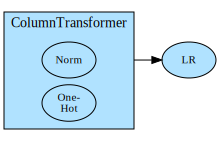

In [47]:
pipeline_trainable = ColumnTransformer(
    transformers=[
        ('num_tfm', Norm(norm='l1'), num_columns),
        ('cat_tfm', OneHot(), cat_columns)]) >> LR()
pipeline_trainable.visualize()

In [48]:
%%time
pipeline_trained = pipeline_trainable.fit(train_X, train_y)

CPU times: user 400 ms, sys: 7.8 ms, total: 408 ms
Wall time: 415 ms


In [49]:
import sklearn.metrics
predictions = pipeline_trained.predict(test_X)
print(f'accuracy {sklearn.metrics.accuracy_score(test_y, predictions):.1%}')

accuracy 76.4%


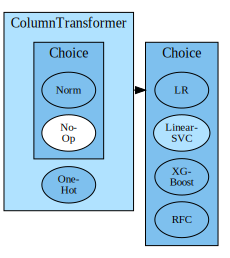

In [75]:
#lets get better results 
pipeline_planned = make_pipeline(
    ColumnTransformer(transformers=[
        ('num_tfm', Norm | NoOp, num_columns),
        ('cat_tfm', OneHot, cat_columns)]), 
    LR | LinearSVC(dual=False)| XGBoost | RFC)
pipeline_planned.visualize()

In [76]:
from lale.lib.lale import Hyperopt
pipe_t = pipeline_planned.auto_configure(train_X, train_y, Hyperopt, cv=3, max_evals=5, scoring = 'roc_auc')

[14:12:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480:      
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weight, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:12:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480:      
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weight, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:12:57] WARNING: /Users/travi

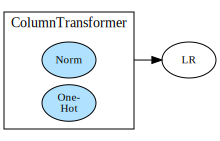

```python
norm = Norm(norm="l1")
column_transformer = ColumnTransformer(
    transformers=[
        (
            "num_tfm",
            norm,
            [
                "Duration",
                "Credit amount ",
                "Install_rate",
                "Present_residence",
                "Age",
                "Num_credits",
                "Num_dependents",
            ],
        ),
        (
            "cat_tfm",
            OneHot(),
            [
                "Check_Account ",
                "Credit_history",
                "Purpose",
                "Saving_account",
                "Employment",
                "Personal_status",
                "Other_debrotors",
                "Property",
                "Installment_plant",
                "Housing",
                "Job",
                "Telephone",
                "Foreign",
            ],
        ),
    ]
)
pipeline = column_transformer >> LR()
```

In [77]:
pipeline_trained.visualize()
pipeline_trained.pretty_print(ipython_display=True, show_imports=False)

In [85]:
#not quite where we want to be so perhaps we can fine-tune more
predictions = pipeline_trained.predict(test_X)
print(f'accuracy {sklearn.metrics.accuracy_score(test_y, predictions):.1%}')
print(f'roc_auc {sklearn.metrics.roc_auc_score(test_y, predictions):.1%}')

accuracy 76.4%
roc_auc 68.0%
